# Title: Loan Delinquency Prediction Using Data Science Models

## Introduction
The purpose of this project is to develop a predictive model that can assess the likelihood of a loan becoming delinquent (90+ days overdue) within a 12-month period. 

## Data Loading and Description
### Data Source

In [1]:
import pandas as pd

train_data = pd.read_csv('./data/train_data.csv', index_col=0)
val_data = pd.read_csv('./data/valid_data.csv', index_col=0)

### Exploratory Data Analysis (EDA)

The <b>train_data.csv</b> dataset contains 37 columns, all of which are of type float64 or int64. Detailed information about each column can be found in the <b>Использованные переменные.xlsx</b> file, which includes descriptions in both English and Russian.
However, for analysis and visualization, we will focus on the most relevant columns:
<ul>
<li><b>target</b>: Target variable indicating delinquency.</li>
<li><b>total_amount</b>: Total amount of the loan.</li>
<li><b>f8</b>: Feature 8, related to borrower information.</li>
<li><b>age2</b>: Age of the borrower.</li>
<li><b>active_crd_amount_to_limit</b>: Ratio of active credit amount to limit.</li>
<li><b>days_90_queries</b>: Number of queries in the past 90 days.</li>
<li><b>avg_active_credit_limit</b>: Average active credit limit.</li>
</ul>

In [2]:
train_data.describe()

,days_90_queries,flag_zpexp,ageolddate_f7,f41_my,age2,f39_my,active_crd_amount_to_limit,sumlastvalue_7_f50,avg_active_credit_limit,total_amount,...,agelifelastterm_f29,cntstartcntr_3_f75,closedel_12_f95,max_active_crd_res_amount_to_limit,active_number_of_outstanding_instalments,value_cr_card_contract,final_resincome,f8,inst_credit_cnt,target
count,54275.000000,55712.000000,55259.000000,23777.000000,55712.000000,19307.000000,36437.000000,3.303600e+04,3.820700e+04,5.225100e+04,...,51112.000000,55260.000000,55254.000000,38207.000000,43463.000000,54310.000000,16911.000000,5.128700e+04,43092.000000,55712.000000
mean,12.090392,0.135824,75.889520,18.675064,34.386326,26.837054,0.721308,4.908516e+04,7.590147e+05,6.492674e+06,...,15.077125,2.835993,1.123919,0.778214,78.835768,4914.701897,12.961345,4.163461e+04,20.004897,0.187195
std,12.974924,0.342604,110.292805,15.371279,9.609283,18.222779,0.220594,1.671543e+05,9.094260e+05,1.597336e+07,...,26.510788,4.094233,2.214252,0.272560,85.511028,12527.493882,0.838236,5.798415e+04,19.505226,0.390071
min,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000006,0.000000e+00,1.000000e+00,1.846520e+03,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.166784,0.000000e+00,0.000000,0.000000
25%,3.000000,0.000000,46.000000,7.000000,27.000000,13.000000,0.597431,9.904000e+03,2.000000e+05,9.851385e+05,...,1.000000,0.000000,0.000000,0.667182,23.000000,0.000000,12.430451,1.745494e+04,8.000000,0.000000
50%,8.000000,0.000000,71.000000,14.000000,33.000000,23.000000,0.767137,2.544739e+04,5.250000e+05,2.653513e+06,...,5.000000,2.000000,0.000000,0.879608,53.000000,1.000000,13.033576,3.237733e+04,14.000000,0.000000
75%,17.000000,0.000000,102.000000,27.000000,40.000000,39.000000,0.896207,5.631332e+04,9.667733e+05,7.073712e+06,...,16.000000,4.000000,1.000000,0.984520,104.000000,382.000000,13.519280,5.410904e+04,26.000000,0.000000
max,138.000000,1.000000,24158.000000,154.000000,89.000000,145.000000,1.969946,2.045004e+07,2.122999e+07,1.785822e+09,...,667.000000,89.000000,42.000000,8.059675,1589.000000,119128.000000,19.641366,4.953765e+06,244.000000,1.000000


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55712 entries, 0 to 55711
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   days_90_queries                           54275 non-null  float64
 1   flag_zpexp                                55712 non-null  int64  
 2   ageolddate_f7                             55259 non-null  float64
 3   f41_my                                    23777 non-null  float64
 4   age2                                      55712 non-null  float64
 5   f39_my                                    19307 non-null  float64
 6   active_crd_amount_to_limit                36437 non-null  float64
 7   sumlastvalue_7_f50                        33036 non-null  float64
 8   avg_active_credit_limit                   38207 non-null  float64
 9   total_amount                              52251 non-null  float64
 10  amount_of_last_term_contr              

In [4]:
print("\nTarget Variable Distribution:")
print(train_data['target'].value_counts())


Target Variable Distribution:
target
0    45283
1    10429
Name: count, dtype: int64


In [5]:
train_data.isnull().sum()

days_90_queries                              1437
flag_zpexp                                      0
ageolddate_f7                                 453
f41_my                                      31935
age2                                            0
f39_my                                      36405
active_crd_amount_to_limit                  19275
sumlastvalue_7_f50                          22676
avg_active_credit_limit                     17505
total_amount                                 3461
amount_of_last_term_contr                    8546
avgcontractlife                              7265
sm_plus_3_months_rt                         13807
ageoldexsdate_f5                             1759
total_crd_cnt                                 452
gender                                        453
inst_crd_cnt                                11750
avg_active_amount                           12250
max_overdue_cr_card                          1402
overdue_credit_contract                      1402


### Visualization

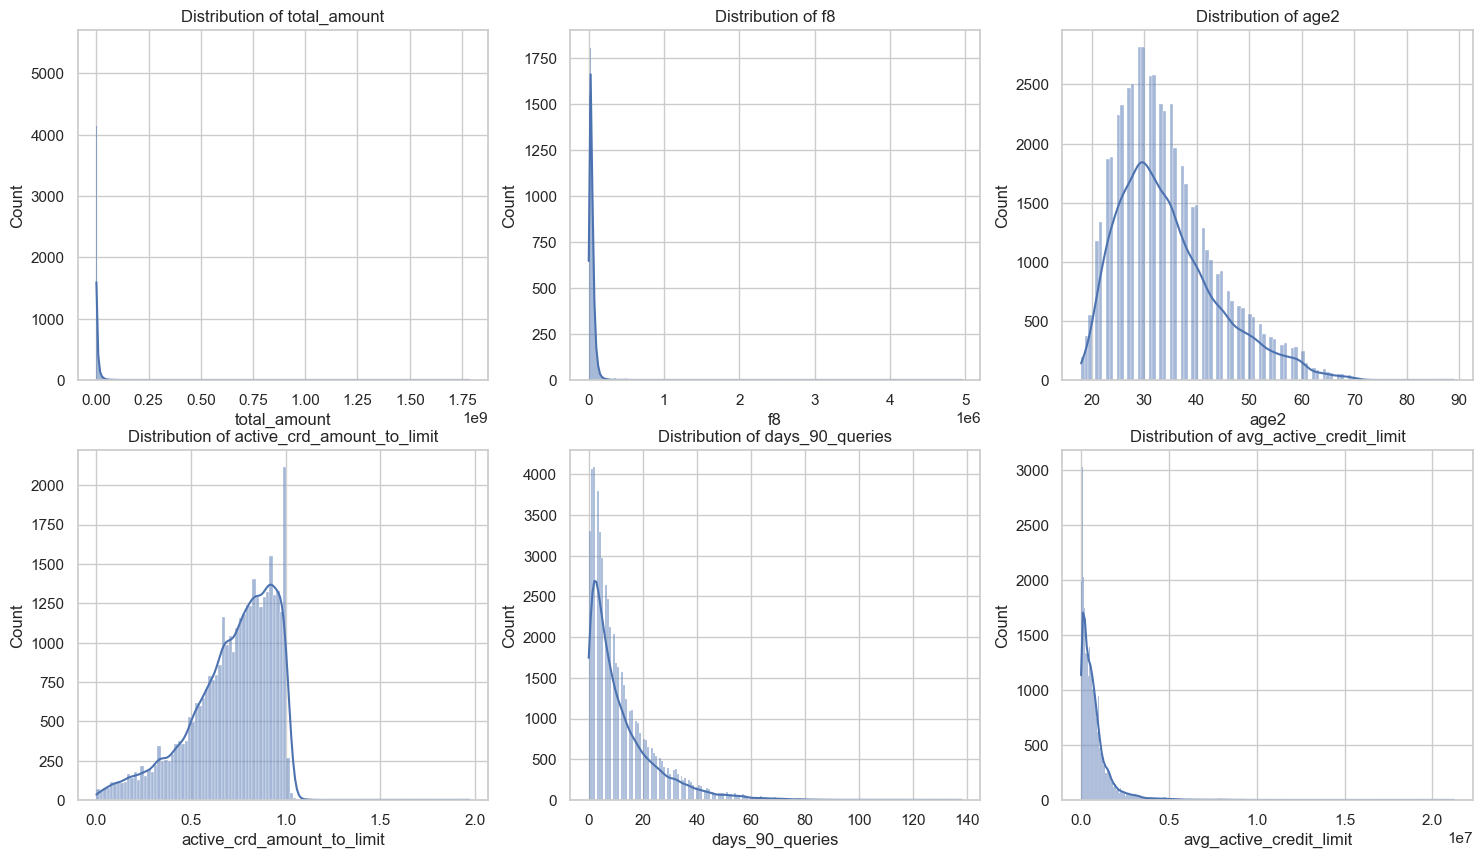

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['target', 'total_amount', 'f8', 'age2', 'active_crd_amount_to_limit', 'days_90_queries', 'avg_active_credit_limit']
data_subset = train_data[selected_columns]

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for ax, col in zip(axes.flatten(), data_subset.columns[1:]):
    sns.histplot(data_subset[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

Text(0.5, 1.0, 'Correlation Matrix')

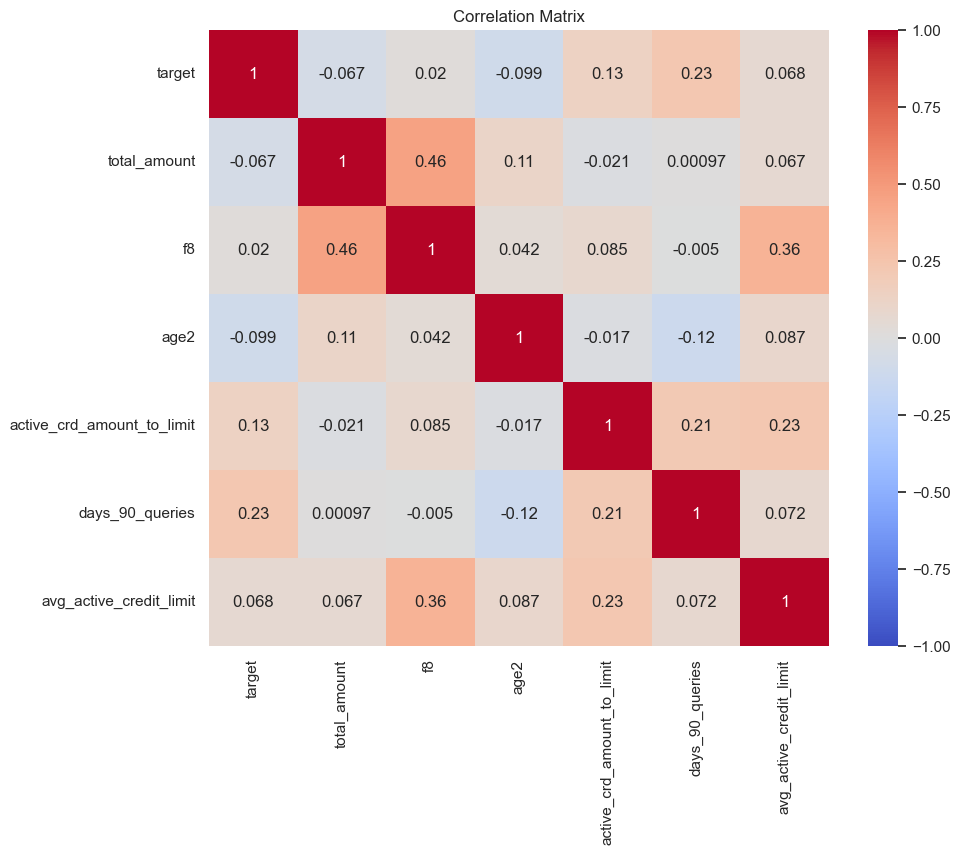

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_subset.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix')

## Data Preprocessing
### Data Cleaning

In [8]:
train_data.fillna(train_data.median(), inplace=True)
val_data.fillna(val_data.median(), inplace=True)

### Feature Engineering

In [9]:
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']
X_val = val_data.drop('target', axis=1)
y_val = val_data['target']

## Model Building
### Model selection

<b>Random Forest</b> was selected as the best model due to its highest <b>AUC-ROC</b> (0.8435) on the validation set compared to other models (Logistic Regression: 0.7117, Decision Tree: 0.6220, XGBoost: 0.8132). The model demonstrated a strong balance between <b>Precision</b> (0.4339) and <b>Recall</b> (0.3908), achieving the highest <b>F1 Score</b> (0.4112), which indicates its reliability in identifying delinquent loans. Cross-validation results with a high average AUC (0.9718) further confirmed the model’s robustness and stability, establishing it as the optimal choice for this task.

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

model_results = {}

def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]
    
    auc = roc_auc_score(y_val, y_proba)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    print(f"AUC-ROC: {auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    
    return {"AUC-ROC": auc, "Precision": precision, "Recall": recall, "F1 Score": f1}

### Model training

In [12]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

for model_name, model in models.items():
    print(f"\nTraining and Evaluating {model_name}...")
    model.fit(X_train_smote, y_train_smote)
    model_results[model_name] = evaluate_model(model, X_val, y_val)

# Сравнение моделей и выбор лучшей по метрике AUC-ROC
best_model_name = max(model_results, key=lambda x: model_results[x]["AUC-ROC"])
best_model = models[best_model_name]
print(f"\nBest Model based on Validation AUC-ROC: {best_model_name} with AUC-ROC: {model_results[best_model_name]['AUC-ROC']}")



Training and Evaluating Logistic Regression...


C:\Users\Kuralay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC-ROC: 0.7117
Precision: 0.1709
Recall: 0.6928
F1 Score: 0.2742
Confusion Matrix:
[[7629 4540]
 [ 415  936]]

Training and Evaluating Decision Tree...
AUC-ROC: 0.6220
Precision: 0.2086
Recall: 0.4123
F1 Score: 0.2770
Confusion Matrix:
[[10056  2113]
 [  794   557]]

Training and Evaluating Random Forest...
AUC-ROC: 0.8435
Precision: 0.4339
Recall: 0.3908
F1 Score: 0.4112
Confusion Matrix:
[[11480   689]
 [  823   528]]

Training and Evaluating XGBoost...
AUC-ROC: 0.8132
Precision: 0.3057
Recall: 0.4278
F1 Score: 0.3566
Confusion Matrix:
[[10856  1313]
 [  773   578]]

Best Model based on Validation AUC-ROC: Random Forest with AUC-ROC: 0.84349284828354


## Cross-validation

In [13]:
from sklearn.model_selection import cross_val_score

print("\nPerforming Cross-Validation for Random Forest...")
cv_scores = cross_val_score(best_model, X_train_smote, y_train_smote, cv=5, scoring='roc_auc')

print("Cross-Validation AUC Scores:", cv_scores)
print("Average AUC from Cross-Validation:", cv_scores.mean())


Performing Cross-Validation for Random Forest...
Cross-Validation AUC Scores: [0.90340976 0.97717024 0.99373968 0.99399914 0.99061936]
Average AUC from Cross-Validation: 0.9717876357025969


## Model Evaluation

Evaluating the Best Model on Validation Data:
AUC-ROC: 0.8435
Precision: 0.4339
Recall: 0.3908
F1 Score: 0.4112
Confusion Matrix:
[[11480   689]
 [  823   528]]


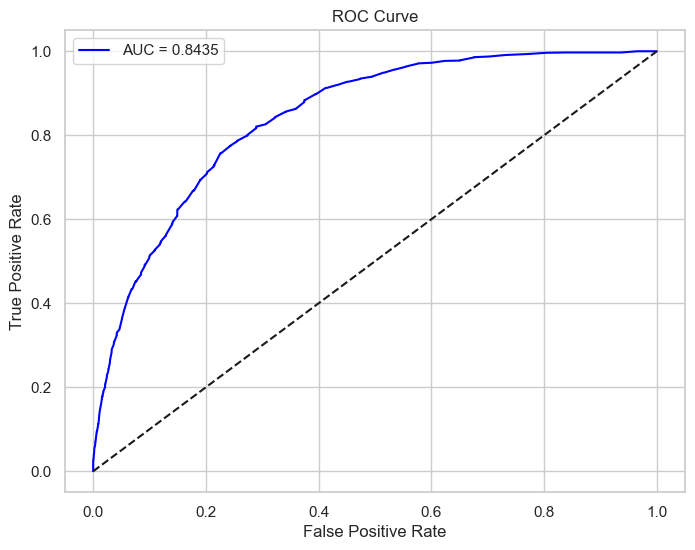

In [15]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]
    
    auc = roc_auc_score(y_val, y_proba)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    print(f"AUC-ROC: {auc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    
    fpr, tpr, thresholds = roc_curve(y_val, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

print("Evaluating the Best Model on Validation Data:")
evaluate_model(best_model, X_val, y_val)


## Summary

The capstone project developed a model to predict 12-month loan delinquency risk. Random Forest was chosen as the best model with an AUC-ROC of 0.8435, balancing Precision (0.4339) and Recall (0.3908) effectively. Cross-validation confirmed its robustness, making it suitable for supporting financial risk management.